In [2]:
import pandas as pd

data = pd.read_excel(r"C:\Users\shima\Downloads\archive (1)\online_retail_II.xlsx")

data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [5]:
# Column 'Description' is an unnecessary column, so droping it

data.drop(columns=['Description'] , inplace= True)

In [6]:
#Droping NaN values from 'Customer ID' column 

data = data.dropna(subset=['Customer ID']).reset_index(drop=True)

In [7]:
# Converting data type of 'Customer Id' from 'float64' ------> 'Int64'

data['Customer ID'] = data['Customer ID'].astype('Int64')

In [39]:
# Encoding categorical column 'Country'

cat_columns = data['Country']

encoded_data = pd.get_dummies(cat_columns)
encoded_data

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
417530,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
417531,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
417532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
#Checking some columns that were marked as 'C' (Cancelled Order)

mask = data['Invoice'].str.contains('c', case=False, na=False)
data.loc[mask, 'Invoice'].head(10)


178    C489449
179    C489449
180    C489449
181    C489449
182    C489449
183    C489449
184    C489449
185    C489449
186    C489449
196    C489459
Name: Invoice, dtype: object

In [9]:
'''Now for the project "Customer Purchase Behaviour & Return Fraud Prediction" we have to create features that does not
included by the data set, for ex 'is_froud (output column)' , 'total_amount' etc.
'''
#Feature - 1

data['Total_amount'] = (data['Quantity'] * data['Price']).abs()

data.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Total_amount
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [10]:
# Creating a return column
# Feature - 2

data['is_return'] = (data['Quantity'] < 0).astype(int)
data['is_return']

0         0
1         0
2         0
3         0
4         0
         ..
417529    0
417530    0
417531    0
417532    0
417533    0
Name: is_return, Length: 417534, dtype: int64

In [11]:
# Feature - 3
# Finding The invoice columns contains 'C' or not

    # 'C' -----> Canceled order

data['Invoice'].str.contains('C', case=False, na=False).any()

np.True_

In [12]:
# Creating Feature-3 is_cancelled
# If letter starts with 'C' , it is Cancelled Order 

data['is_cancelled'] = (data['Invoice'].astype(str).str.startswith('c').astype(int))

In [13]:
#Feature - 4 , absolute quantity (Converting Quantity features into absolute value)

data['quantity_abs'] = data['Quantity'].abs()

In [14]:
#Feature-5 , Separating Bulk products

data['is_bulk'] = (data['quantity_abs'] >= 10).astype(int)

In [15]:
#Feature-6
#Extracting hour of purchase from columns 'InvoiceDate' 

data['invoice_hour'] = data['InvoiceDate'].dt.hour


In [16]:
#Feature-7 , extracting day of week

data['invoice_dayofweek'] = data['InvoiceDate'].dt.dayofweek

In [17]:
'''
Feature-8
For analysing buying behaviuor on weekend and weekday , we are creating weekend columns '''

data['is_weekend'] = data['invoice_dayofweek'].isin([5,6]).astype(int)

In [18]:
# Feature-9
'''for Repeated purchases, Basket size, Suspicious repetitions'''

invoice_freq = data['Invoice'].value_counts()
data['invoice_frequency'] = data['Invoice'].map(invoice_freq)

In [19]:
# Feature-10 , Customer Transaction Count

cust_freq = data['Customer ID'].value_counts()
data['customer_txn_count'] = data['Customer ID'].map(cust_freq)

In [20]:
# Feature -11 , Finding Customer total spend

cust_spend = data.groupby('Customer ID')['Total_amount'].sum()
data['customer_total_spend'] = data['Customer ID'].map(cust_spend)

In [21]:
#feature -12 , Customer average Spend

cust_avg = data.groupby('Customer ID')['Total_amount'].mean()
data['customer_avg_amount'] = data['Customer ID'].map(cust_avg)

In [22]:
data[
    ['Total_amount','is_return','is_cancelled',
     'quantity_abs','is_bulk',
     'invoice_hour','is_weekend',
     'invoice_frequency','customer_txn_count']
].head()


,Total_amount,is_return,is_cancelled,quantity_abs,is_bulk,invoice_hour,is_weekend,invoice_frequency,customer_txn_count
0,83.4,0,0,12,1,7,0,8,63
1,81.0,0,0,12,1,7,0,8,63
2,81.0,0,0,12,1,7,0,8,63
3,100.8,0,0,48,1,7,0,8,63
4,30.0,0,0,24,1,7,0,8,63


In [23]:
#Feature - 13, creating froud label

data['is_fraud'] = ((data['customer_txn_count'] > 5) & (data['is_return'] == 1) &
    (data['customer_avg_amount'] > data['customer_avg_amount'].quantile(0.75))).astype(int)

data['is_fraud'].value_counts()


is_fraud
0    413480
1      4054
Name: count, dtype: int64

In [25]:
# Comparing froud and non froud data 

comparison = data.groupby('is_fraud')[
    ['Total_amount',
     'invoice_frequency',
     'customer_txn_count',
     'customer_avg_amount',
     'is_bulk',
     'is_weekend']
].mean()

comparison


,Total_amount,invoice_frequency,customer_txn_count,customer_avg_amount,is_bulk,is_weekend
is_fraud,,,,,,
0,21.807396,43.760080,535.075155,21.842230,0.345361,0.179895
1,73.723717,7.061667,619.934632,70.170874,0.276517,0.050567


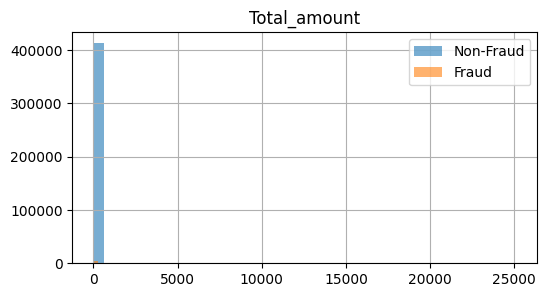

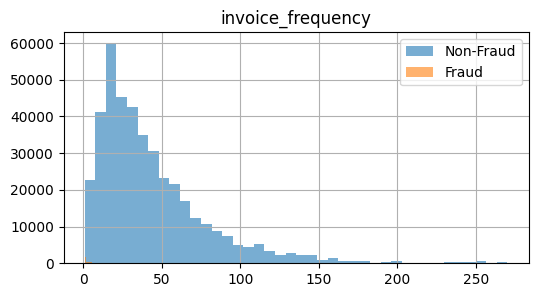

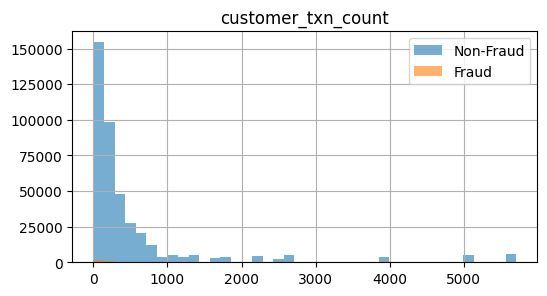

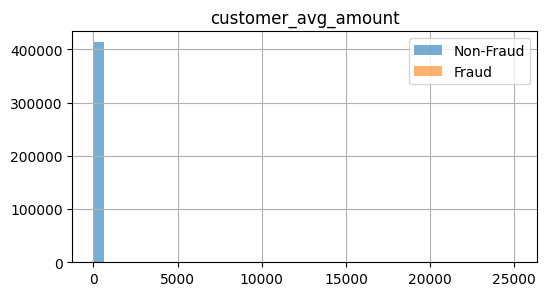

In [ ]:
import matplotlib.pyplot as plt

features_to_check = ['Total_amount','invoice_frequency','customer_txn_count','customer_avg_amount']

for col in features_to_check:
    plt.figure(figsize=(6,3))
    data[data['is_fraud']==0][col].hist(alpha=0.6, bins=40, label='Non-Fraud')
    data[data['is_fraud']==1][col].hist(alpha=0.6, bins=40, label='Fraud')
    plt.title(col)
    plt.legend()
    plt.show()


In [27]:
data.groupby('is_fraud')[['is_return','is_cancelled']].mean()

,is_return,is_cancelled
is_fraud,,
0,0.013991,0.0
1,1.000000,0.0


In [28]:
data.groupby('is_fraud')[['is_weekend','invoice_hour']].mean()

,is_weekend,invoice_hour
is_fraud,,
0,0.179895,12.879639
1,0.050567,13.164036


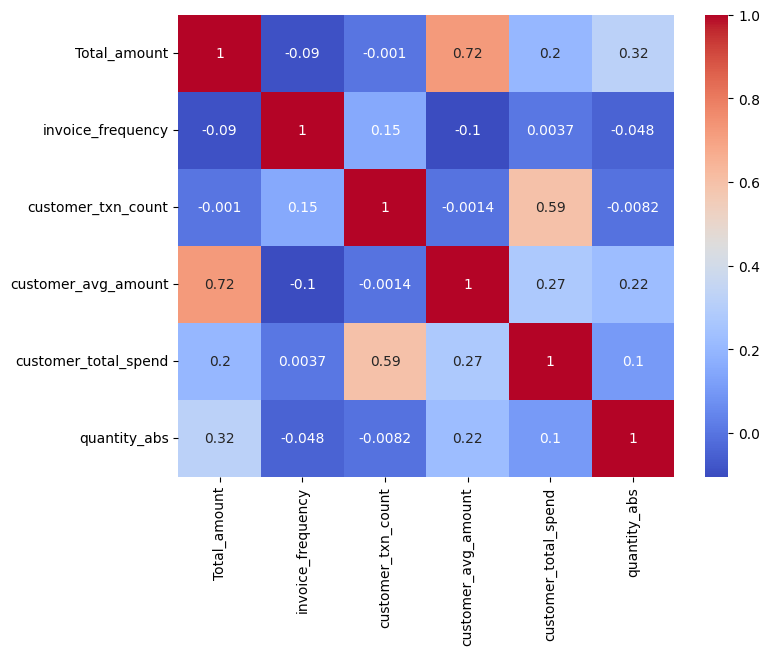

In [29]:
# Checking repetition of the data

import seaborn as sns
import numpy as np

feature_cols = ['Total_amount','invoice_frequency','customer_txn_count','customer_avg_amount','customer_total_spend','quantity_abs']

corr = data[feature_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [30]:
# Checking with statistics

stats = data.groupby('is_fraud')[feature_cols].agg(['mean','std'])
stats

Total_amount             invoice_frequency             \
                 mean         std              mean        std   
is_fraud                                                         
0           21.807396   92.542739         43.760080  35.926768   
1           73.723717  376.804721          7.061667   9.450647   

         customer_txn_count              customer_avg_amount              \
                       mean          std                mean         std   
is_fraud                                                                   
0                535.075155   999.885603           21.842230   70.969392   
1                619.934632  1129.783202           70.170874  127.848287   

         customer_total_spend               quantity_abs              
                         mean           std         mean         std  
is_fraud                                                              
0                11687.121136  34458.114408    13.459439   96.179777  
1                28743.460722  48587.648490    45.880612  328.544998

In [31]:
# Droping leakage & redundant features
features_to_drop = ['is_return',  'customer_total_spend', 'Total_amount']

final_data = data.drop(columns=features_to_drop)


In [32]:
#converting transactional level data into customer behaviour table

customer_df = final_data.groupby('Customer ID').agg(
    
    {'invoice_frequency': 'mean',
    'customer_txn_count': 'max',
    'customer_avg_amount': 'mean',
    'is_bulk': 'mean',
    'is_weekend': 'mean',
    'invoice_hour': 'mean'}).reset_index()


In [33]:
#Cleaning Columns Names

customer_df.columns = [
    'Customer ID',
    'avg_invoice_frequency',
    'total_transactions',
    'avg_order_value',
    'bulk_ratio',
    'weekend_ratio',
    'avg_invoice_hour'
]


In [34]:
#Creating again Froud labell

customer_df['is_fraud'] = ((customer_df['avg_order_value'] > customer_df['avg_order_value'].quantile(0.75)) & (customer_df['total_transactions'] > 5)).astype(int)
 
customer_df['is_fraud'].value_counts()


is_fraud
0    3523
1     860
Name: count, dtype: int64

In [ ]:
#Spliting input and output

X = customer_df.drop(columns=['Customer ID', 'is_fraud'])
y = customer_df['is_fraud']


In [36]:
X.info()
y.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avg_invoice_frequency  4383 non-null   float64
 1   total_transactions     4383 non-null   Int64  
 2   avg_order_value        4383 non-null   float64
 3   bulk_ratio             4383 non-null   float64
 4   weekend_ratio          4383 non-null   float64
 5   avg_invoice_hour       4383 non-null   float64
dtypes: Int64(1), float64(5)
memory usage: 209.9 KB


is_fraud
0    3523
1     860
Name: count, dtype: int64

In [37]:
#Feature Scalling

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
#Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
